In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')
	
from src.SMT_Analysis_BP.databases.trajectory_analysis_script import *
import matplotlib.pyplot as plt
import os
import numpy as np
from src.SMT_Analysis_BP.helpers.MSD_Utils import *
from src.SMT_Analysis_BP.helpers.plotting_functions import *
from src.SMT_Analysis_BP.helpers.import_functions import *
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.diff_mw import *
from src.SMT_Analysis_BP.Random.scalebars import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
import pickle
import src.SMT_Analysis_BP.Parameter_Store.global_params as param_store

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_10795/2310688594.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
globals = param_store.PIXELSIZES
from warnings import filterwarnings
filterwarnings('ignore',module="DeprecationWarning")
#ignore deprecated warnings
#ignore stacklevel=2 warnings

In [3]:
def perform_run_analysis_bulk(path_keyword_dict:dict,**kwargs)->list:
    '''
    We will do the run analysis in bulk for a set of data which are repeats of a condition

    Parameters:
    -----------
    path_keyword_dict:dict
        A dictionary of the form {cd:{t_string:_,unique_name:_}}
        CD: is the condition directory
        t_string: is the string which if of internal use and signifies the file naming convention
        unique_name: is the unique name of the condition
    **kwargs:
        Keyword arguments which are passed to the run_analysis function
        TODO update this to be more specific

    Returns:
    --------
    list
        A list of the results of the run_analysis function for each condition.
        Each index is a realization of the trajectory_analysis_script.run_analysis class
    '''
    results = {key:{} for key in path_keyword_dict.keys()}
    for data_type,data in path_keyword_dict.items():
        for cd,names in data.items():
            obj= run_analysis(cd,names.get("t_string"),unique_name=names.get("name"))
            obj.read_parameters(minimum_percent_per_drop_in = 0.5, 
                                t_len_u = 100, 
                                t_len_l = 1, 
                                minimum_tracks_per_drop = 3,
                                cluster_t_len_l=7)
            
            obj.get_blob_parameters(threshold=1e-4,
                                    overlap=0,
                                    detection_name='bp',
                                    min_sigma=1/np.sqrt(2),
                                    max_sigma=2.5/np.sqrt(2),
                                    num_sigma=100,
                                    median = False)

            obj.get_fitting_parameters(kwargs={"mask_size":3,
                                                "plot_fit":False,
                                                "fitting_image":"LAP",
                                                "radius_func":np.mean,#identity,
                                                "residual_func":residuals_gaus2d,
                                                "sigma_range":0.5,
                                                "centroid_range":0.5,
                                                "height_range":2})
            obj.type_of_blob ="Scale"
            obj.a_file_style = "new"
            obj.overwrite_cell_localizations = True
            obj.run_flow(masked_movies=True)
            if kwargs.get("save",True):
                obj._make_SMAUG_files(dir_name = "SMAUG_AUTO")
                obj._store_combined_SMAUG_files(combined_dir_name="/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_SMAUG/AUTO_STYLE/{}".format(data_type))
            results[data_type][names.get("name")] = obj
    #pickle the results
    with open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/{}_results.pkl".format(data_type),"wb") as f:
        pickle.dump(results,f)
                

In [4]:
from src.SMT_Analysis_BP.databases.data_path_container import rpoc_ez_paths_keywords,rpoc_hex5_paths_keywords,rpoc_m9_paths_keywords,laci_laco_ez_paths_keywords,laci_laco_m9_paths_keywords,laci_laco_hex5_paths_keywords,rpoc_rif_paths,rpoc_ez_cluster_tracking_paths

    

In [ ]:
#do the analysis
perform_run_analysis_bulk(rpoc_ez_paths_keywords,save=True)
perform_run_analysis_bulk(rpoc_m9_paths_keywords,save=True)
perform_run_analysis_bulk(rpoc_hex5_paths_keywords,save=True)

perform_run_analysis_bulk(laci_laco_ez_paths_keywords,save=True)
perform_run_analysis_bulk(laci_laco_m9_paths_keywords,save=True)
perform_run_analysis_bulk(laci_laco_hex5_paths_keywords,save=True)

perform_run_analysis_bulk(rpoc_rif_paths,save=True)

In [31]:
perform_run_analysis_bulk(rpoc_ez_cluster_tracking_paths,save=True)

All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/Analysis_new/rp_ez_cluster_6_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/Gi

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


SMAUG files saved to: /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/RPOC_CLUSTER_TRACKING/20231009/rp_ez_cluster_MATLAB_dat/SMAUG_AUTO


In [5]:
#load the pickle files
rp_ez_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_EZ_results.pkl"
rp_m9_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_M9_results.pkl"
rp_hex5_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_Hex5_results.pkl"

ll_ez_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_EZ_results.pkl"
ll_m9_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_M9_results.pkl"
ll_hex5_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/LL_Hex5_results.pkl"

rp_rif_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_Rif_results.pkl"

rp_ez_cluster_tracking_pickle = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/RPOC_EZ_cluster_tracking_results.pkl"

In [6]:
#load them
with open(rp_ez_pickle,"rb") as f:
    rp_ez_results = pickle.load(f)
with open(rp_m9_pickle,"rb") as f:
    rp_m9_results = pickle.load(f)
with open(rp_hex5_pickle,"rb") as f:
    rp_hex5_results = pickle.load(f)
with open(ll_ez_pickle,"rb") as f:
    ll_ez_results = pickle.load(f)
with open(ll_m9_pickle,"rb") as f:
    ll_m9_results = pickle.load(f)
with open(ll_hex5_pickle,"rb") as f:
    ll_hex5_results = pickle.load(f)
with open(rp_rif_pickle,"rb") as f:
    rp_rif_results = pickle.load(f)

with open(rp_ez_cluster_tracking_pickle,"rb") as f:
    rp_ez_cluster_tracking_results = pickle.load(f)

In [7]:
MIN_TRACK_LENGTH = 7
MAX_TRACK_LENGTH = 7

In [ ]:
from src.SMT_Analysis_BP.helpers.MSD_Utils import MSD_Calculations

RPOC_ez_MSD = MSD_Calculations(list(list(rp_ez_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)
RPOC_m9_MSD = MSD_Calculations(list(list(rp_m9_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)
RPOC_hex5_MSD = MSD_Calculations(list(list(rp_hex5_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)

LL_ez_MSD = MSD_Calculations(list(list(ll_ez_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)
LL_m9_MSD = MSD_Calculations(list(list(ll_m9_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)
LL_hex5_MSD = MSD_Calculations(list(list(ll_hex5_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)

RPOC_rif_MSD = MSD_Calculations(list(list(rp_rif_results.values())[0].values()),min_track_length=MIN_TRACK_LENGTH,max_track_length=MAX_TRACK_LENGTH)
#save to pickle in the Combined MSD folder
MSD_folder_combined = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD"
if not os.path.exists(MSD_folder_combined):
    os.makedirs(MSD_folder_combined)
with open(os.path.join(MSD_folder_combined,"RPOC_ez_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(RPOC_ez_MSD,f)
with open(os.path.join(MSD_folder_combined,"RPOC_m9_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(RPOC_m9_MSD,f)
with open(os.path.join(MSD_folder_combined,"RPOC_hex5_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(RPOC_hex5_MSD,f)
with open(os.path.join(MSD_folder_combined,"LL_ez_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(LL_ez_MSD,f)
with open(os.path.join(MSD_folder_combined,"LL_m9_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(LL_m9_MSD,f)
with open(os.path.join(MSD_folder_combined,"LL_hex5_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(LL_hex5_MSD,f)

with open(os.path.join(MSD_folder_combined,"RPOC_rif_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH)),"wb") as f:
    pickle.dump(RPOC_rif_MSD,f)
import json
#save a json with the parameter used in the MSD calculations
with open(os.path.join(MSD_folder_combined,"MSD_parameters.json"),"w") as f:
    json.dump({"min_track_length":MIN_TRACK_LENGTH,"max_track_length":MAX_TRACK_LENGTH},f)


    


In [9]:
RPOC_ez_cluster_MSD = MSD_Calculations(list(list(rp_ez_cluster_tracking_results.values())[0].values()),min_track_length=7,max_track_length=7,pixel_to_um=0.065,frame_to_seconds=0.02)


        ##############################################################################################################
        #You have initialized a Calculation class with the following parameters:
        #pixel_size: 0.065
        #frame_length: 0.02
        #pixel_unit: um
        #frame_unit: s
        


In [43]:
#save to pickle in the Combined MSD folder
MSD_folder_combined = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD"
if not os.path.exists(MSD_folder_combined):
    os.makedirs(MSD_folder_combined)
with open(os.path.join(MSD_folder_combined,"RPOC_ez_cluster_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,100)),"wb") as f:
    pickle.dump(RPOC_ez_cluster_MSD,f)

In [8]:
#load the MSD files
RPOC_ez_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/RPOC_ez_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))
RPOC_m9_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/RPOC_m9_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))
RPOC_hex5_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/RPOC_hex5_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))

LL_ez_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/LL_ez_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))
LL_m9_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/LL_m9_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))
LL_hex5_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/LL_hex5_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))

RPOC_rif_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/RPOC_rif_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,MAX_TRACK_LENGTH),"rb"))

RPOC_ez_cluster_MSD = pickle.load(open("/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Combined_SMT_THESIS_CHAPTER_5/Combined_MSD/RPOC_ez_cluster_MSD_min_{0}_max_{1}.pkl".format(MIN_TRACK_LENGTH,100),"rb"))

In [9]:
#fixed ll

loc_err_data= run_analysis(wd="/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/Laci_LacO_Fixed_1%PFA_Photobleaching_20ms/No_Binning_65nm/20231002",
                          t_string="Photobleaching_LL_EZ_fixed")
                  
loc_err_data.read_parameters(minimum_percent_per_drop_in = .5, 
                    t_len_u = 1000, 
                    t_len_l=1,
                    cluster_t_len_l=10, 
                    minimum_tracks_per_drop = 3)

loc_err_data.get_blob_parameters(threshold=1e-4,
                        overlap=0,
                        detection_name='bp',
                        min_sigma=1/np.sqrt(2),
                        max_sigma=2.5/np.sqrt(2),
                        num_sigma=100,
                        median = False)

loc_err_data.get_fitting_parameters(kwargs={"mask_size":3,
                                    "plot_fit":False,
                                    "fitting_image":"Original",
                                    "radius_func":np.mean,#identity,
                                    "residual_func":residuals_gaus2d,
                                    "sigma_range":0.2,
                                    "centroid_range":0.2,
                                    "height_range":2})
loc_err_data.type_of_blob = "Scale"#"SCALE_SPACE_PLUS"#"Scale"#"SCALE_SPACE_PLUS"#"Scale"#"SCALE_SPACE_PLUS"#"SCALE_SPACE_PLUS"
loc_err_data.a_file_style = "new"
loc_err_data.my_name = "locerr"
loc_err_data.overwrite_cell_localizations = True
loc_err_data.run_flow(masked_movies=False) 
tau = 0.02
pixel_to_um = 0.065
msd_class_jd = MSD_Calculations([loc_err_data],pixel_to_um=pixel_to_um,frame_to_seconds=tau,min_track_length=7,max_track_length=7)
ens_msd=msd_class_jd.combined_store["ALL"].ensemble_MSD
ens_msd_error = msd_class_jd.combined_store["ALL"].ensemble_MSD_error

No gfp folder found in /Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/Laci_LacO_Fixed_1%PFA_Photobleaching_20ms/No_Binning_65nm/20231002. Assuming no cell segmentation exists and running analysis without use of segmentation. 
 Note this mean the whole frame is a considered one cell
All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/Laci_LacO_Fixed_1%PFA_Photobleaching_20ms/No_Binning_65nm/20231002/Analysis_new/Photobleaching_LL_EZ_fixed_10_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/Laci_LacO_Fixed_1%PFA_Photobleaching_20ms/No_Binning_65nm/20231002/Analysis_new/Photobleaching_LL_EZ_fixed_11_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/SMT_FAST_CAPTURE/Laci_LacO_Fixed_1%PFA_Photobleaching_20ms/No_Binning_65nm/20231002/Analysis_new/Photobleaching_LL_EZ_fixed_12_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



        ##############################################################################################################
        #You have initialized a Calculation class with the following parameters:
        #pixel_size: 0.065
        #frame_length: 0.02
        #pixel_unit: um
        #frame_unit: s
        


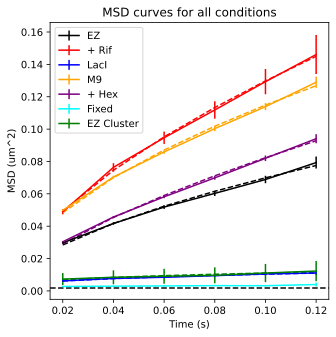

RPOC EZ ALL fit parameters
[0.58300089 0.06507639 0.021     ]
RPOC RIF fit parameters
[0.61593543 0.13193907 0.021     ]
LL EZ fit parameters
[0.42024396 0.00563807 0.02099955]
RPOC M9 fit parameters
[0.5513153  0.10045234 0.021     ]
RPOC Hex5 fit parameters
[0.66962514 0.09397583 0.021     ]
RPOC EZ IN fit parameters
[0.22412268 0.00715814 0.02099999]
RPOC EZ IO fit parameters
[0.54453836 0.07594434 0.021     ]
RPOC EZ OUT fit parameters
[0.61316388 0.07656821 0.021     ]
RPOC M9 IN fit parameters
[0.18282856 0.00903263 0.02      ]
RPOC M9 IO fit parameters
[0.50983751 0.10239865 0.021     ]
RPOC M9 OUT fit parameters
[0.60074946 0.13626195 0.021     ]
RPOC Hex5 IN fit parameters
[0.26839688 0.00575627 0.02098731]
RPOC Hex5 IO fit parameters
[0.5635495  0.08060965 0.021     ]
RPOC Hex5 OUT fit parameters
[0.69494244 0.11059262 0.021     ]
LL EZ IN fit parameters
[0.24003217 0.00110823 0.021     ]
LL EZ IO fit parameters
[0.53452191 0.03262337 0.021     ]
LL EZ OUT fit parameters
[0.4

In [10]:
msd_rpoc_ez_curve_in = RPOC_ez_MSD.combined_store["IN"].ensemble_MSD
msd_error_rpoc_ez_curve_in = RPOC_ez_MSD.combined_store["IN"].ensemble_MSD_error
msd_rpoc_ez_curve_io = RPOC_ez_MSD.combined_store["IO"].ensemble_MSD
msd_error_rpoc_ez_curve_io = RPOC_ez_MSD.combined_store["IO"].ensemble_MSD_error
msd_rpoc_ez_curve_out = RPOC_ez_MSD.combined_store["OUT"].ensemble_MSD
msd_error_rpoc_ez_curve_out = RPOC_ez_MSD.combined_store["OUT"].ensemble_MSD_error
msd_rpoc_ez_curve_all = RPOC_ez_MSD.combined_store["ALL"].ensemble_MSD
msd_error_rpoc_ez_curve_all = RPOC_ez_MSD.combined_store["ALL"].ensemble_MSD_error

#repeat for the LL
msd_ll_ez_curve_in = LL_ez_MSD.combined_store["IN"].ensemble_MSD
msd_error_ll_ez_curve_in = LL_ez_MSD.combined_store["IN"].ensemble_MSD_error
msd_ll_ez_curve_io = LL_ez_MSD.combined_store["IO"].ensemble_MSD
msd_error_ll_ez_curve_io = LL_ez_MSD.combined_store["IO"].ensemble_MSD_error
msd_ll_ez_curve_out = LL_ez_MSD.combined_store["OUT"].ensemble_MSD
msd_error_ll_ez_curve_out = LL_ez_MSD.combined_store["OUT"].ensemble_MSD_error
msd_ll_ez_curve_all = LL_ez_MSD.combined_store["ALL"].ensemble_MSD
msd_error_ll_ez_curve_all = LL_ez_MSD.combined_store["ALL"].ensemble_MSD_error

#repeat for the cluster
msd_rp_ez_cluster_curve_ALL = RPOC_ez_cluster_MSD.combined_store["ALL"].ensemble_MSD


#rpoc rif
msd_rpoc_rif_all = RPOC_rif_MSD.combined_store["ALL"].ensemble_MSD
msd_error_rpoc_rif_all = RPOC_rif_MSD.combined_store["ALL"].ensemble_MSD_error

#rpoc m9
msd_rpoc_m9_curve_in = RPOC_m9_MSD.combined_store["IN"].ensemble_MSD
msd_error_rpoc_m9_curve_in = RPOC_m9_MSD.combined_store["IN"].ensemble_MSD_error
msd_rpoc_m9_curve_io = RPOC_m9_MSD.combined_store["IO"].ensemble_MSD
msd_error_rpoc_m9_curve_io = RPOC_m9_MSD.combined_store["IO"].ensemble_MSD_error
msd_rpoc_m9_curve_out = RPOC_m9_MSD.combined_store["OUT"].ensemble_MSD
msd_error_rpoc_m9_curve_out = RPOC_m9_MSD.combined_store["OUT"].ensemble_MSD_error
msd_rpoc_m9_curve_all = RPOC_m9_MSD.combined_store["ALL"].ensemble_MSD
msd_error_rpoc_m9_curve_all = RPOC_m9_MSD.combined_store["ALL"].ensemble_MSD_error

#rpoc hex5
msd_rpoc_hex5_curve_in = RPOC_hex5_MSD.combined_store["IN"].ensemble_MSD
msd_error_rpoc_hex5_curve_in = RPOC_hex5_MSD.combined_store["IN"].ensemble_MSD_error
msd_rpoc_hex5_curve_io = RPOC_hex5_MSD.combined_store["IO"].ensemble_MSD
msd_error_rpoc_hex5_curve_io = RPOC_hex5_MSD.combined_store["IO"].ensemble_MSD_error
msd_rpoc_hex5_curve_out = RPOC_hex5_MSD.combined_store["OUT"].ensemble_MSD
msd_error_rpoc_hex5_curve_out = RPOC_hex5_MSD.combined_store["OUT"].ensemble_MSD_error
msd_rpoc_hex5_curve_all = RPOC_hex5_MSD.combined_store["ALL"].ensemble_MSD
msd_error_rpoc_hex5_curve_all = RPOC_hex5_MSD.combined_store["ALL"].ensemble_MSD_error


#fit the ensemble MSD curves to a power law defined as power_law_xy set the loc_error_x and _y to be 0.021
from scipy.optimize import curve_fit
#D,a,loc_error_x,loc_error_y, but the last two are hard coded to be 0.021
param_guess = [0.1,0.1,0.021]
def power_law_xy(t,alpha,D,loc_msd_y):
    sigma = loc_msd_y *np.sqrt(1 + 2*D*(t**(alpha))/((alpha+1)*(alpha+2)*(0.13)))
    return 4*(sigma**2) + 4.*D*(t**(alpha))

#rpoc ez
popt_rpoc_ez_curve_in,pcov_rpoc_ez_curve_in = curve_fit(power_law_xy,list(msd_rpoc_ez_curve_in.keys()),list(msd_rpoc_ez_curve_in.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_ez_curve_io,pcov_rpoc_ez_curve_io = curve_fit(power_law_xy,list(msd_rpoc_ez_curve_io.keys()),list(msd_rpoc_ez_curve_io.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_ez_curve_out,pcov_rpoc_ez_curve_out = curve_fit(power_law_xy,list(msd_rpoc_ez_curve_out.keys()),list(msd_rpoc_ez_curve_out.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_ez_curve_all,pcov_rpoc_ez_curve_all = curve_fit(power_law_xy,list(msd_rpoc_ez_curve_all.keys()),list(msd_rpoc_ez_curve_all.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))

#rpoc rif
popt_rpoc_rif_all,pcov_rpoc_rif_all = curve_fit(power_law_xy,list(msd_rpoc_rif_all.keys()),list(msd_rpoc_rif_all.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))

#rpoc m9
popt_rpoc_m9_curve_in,pcov_rpoc_m9_curve_in = curve_fit(power_law_xy,list(msd_rpoc_m9_curve_in.keys()),list(msd_rpoc_m9_curve_in.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_m9_curve_io,pcov_rpoc_m9_curve_io = curve_fit(power_law_xy,list(msd_rpoc_m9_curve_io.keys()),list(msd_rpoc_m9_curve_io.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_m9_curve_out,pcov_rpoc_m9_curve_out = curve_fit(power_law_xy,list(msd_rpoc_m9_curve_out.keys()),list(msd_rpoc_m9_curve_out.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_m9_curve_all,pcov_rpoc_m9_curve_all = curve_fit(power_law_xy,list(msd_rpoc_m9_curve_all.keys()),list(msd_rpoc_m9_curve_all.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))

#rpoc hex5
popt_rpoc_hex5_curve_in,pcov_rpoc_hex5_curve_in = curve_fit(power_law_xy,list(msd_rpoc_hex5_curve_in.keys()),list(msd_rpoc_hex5_curve_in.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_hex5_curve_io,pcov_rpoc_hex5_curve_io = curve_fit(power_law_xy,list(msd_rpoc_hex5_curve_io.keys()),list(msd_rpoc_hex5_curve_io.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_hex5_curve_out,pcov_rpoc_hex5_curve_out = curve_fit(power_law_xy,list(msd_rpoc_hex5_curve_out.keys()),list(msd_rpoc_hex5_curve_out.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_rpoc_hex5_curve_all,pcov_rpoc_hex5_curve_all = curve_fit(power_law_xy,list(msd_rpoc_hex5_curve_all.keys()),list(msd_rpoc_hex5_curve_all.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))

#ll ez
popt_ll_ez_curve_in,pcov_ll_ez_curve_in = curve_fit(power_law_xy,list(msd_ll_ez_curve_in.keys()),list(msd_ll_ez_curve_in.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_ll_ez_curve_io,pcov_ll_ez_curve_io = curve_fit(power_law_xy,list(msd_ll_ez_curve_io.keys()),list(msd_ll_ez_curve_io.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_ll_ez_curve_out,pcov_ll_ez_curve_out = curve_fit(power_law_xy,list(msd_ll_ez_curve_out.keys()),list(msd_ll_ez_curve_out.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))
popt_ll_ez_curve_all,pcov_ll_ez_curve_all = curve_fit(power_law_xy,list(msd_ll_ez_curve_all.keys()),list(msd_ll_ez_curve_all.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))

#cluster rp
popt_rp_ez_cluster_curve_ALL,pcov_rp_ez_cluster_curve_ALL = curve_fit(power_law_xy,list(msd_rp_ez_cluster_curve_ALL.keys()),list(msd_rp_ez_cluster_curve_ALL.values()),p0=param_guess,maxfev=100000,bounds=([0,0,0.02],[2,np.inf,0.021]))


import matplotlib.gridspec as gs
fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
ax.errorbar(list(msd_rpoc_ez_curve_all.keys()),list(msd_rpoc_ez_curve_all.values()),yerr=np.array(list(msd_error_rpoc_ez_curve_all.values()))*1.96,label="EZ",color="black")
ax.errorbar(list(msd_rpoc_rif_all.keys()),list(msd_rpoc_rif_all.values()),yerr=np.array(list(msd_error_rpoc_rif_all.values()))*1.96,label="+ Rif",color="red")
ax.errorbar(list(msd_ll_ez_curve_all.keys()),list(msd_ll_ez_curve_all.values()),yerr=np.array(list(msd_error_ll_ez_curve_all.values()))*1.96,label="LacI",color="blue")
ax.errorbar(list(msd_rpoc_m9_curve_all.keys()),list(msd_rpoc_m9_curve_all.values()),yerr=np.array(list(msd_error_rpoc_m9_curve_all.values()))*1.96,label="M9",color="orange")
ax.errorbar(list(msd_rpoc_hex5_curve_all.keys()),list(msd_rpoc_hex5_curve_all.values()),yerr=np.array(list(msd_error_rpoc_hex5_curve_all.values()))*1.96,label="+ Hex",color="purple")
ax.errorbar(list(ens_msd.keys()),list(ens_msd.values()),yerr=np.array(list(ens_msd_error.values()))*1.96,label="Fixed",color="cyan")
ax.errorbar(list(msd_rp_ez_cluster_curve_ALL.keys()),list(msd_rp_ez_cluster_curve_ALL.values()),yerr=np.array(list(msd_rp_ez_cluster_curve_ALL.values()))/1.96,label="EZ Cluster",color="green")

#plot the power law fits
ax.plot(list(msd_rpoc_ez_curve_all.keys()),power_law_xy(list(msd_rpoc_ez_curve_all.keys()),*popt_rpoc_ez_curve_all),color="black",linestyle="--")
ax.plot(list(msd_rpoc_rif_all.keys()),power_law_xy(list(msd_rpoc_rif_all.keys()),*popt_rpoc_rif_all),color="red",linestyle="--")
ax.plot(list(msd_ll_ez_curve_all.keys()),power_law_xy(list(msd_ll_ez_curve_all.keys()),*popt_ll_ez_curve_all),color="blue",linestyle="--")
ax.plot(list(msd_rpoc_m9_curve_all.keys()),power_law_xy(list(msd_rpoc_m9_curve_all.keys()),*popt_rpoc_m9_curve_all),color="orange",linestyle="--")
ax.plot(list(msd_rpoc_hex5_curve_all.keys()),power_law_xy(list(msd_rpoc_hex5_curve_all.keys()),*popt_rpoc_hex5_curve_all),color="purple",linestyle="--")
ax.plot(list(msd_rp_ez_cluster_curve_ALL.keys()),power_law_xy(list(msd_rp_ez_cluster_curve_ALL.keys()),*popt_rp_ez_cluster_curve_ALL),color="green",linestyle="--")

#plot a horizontal line at 0.0018
ax.axhline(0.0018,color="black",linestyle="--")

ax.set_xlabel("Time (s)")
ax.set_ylabel("MSD (um^2)")
ax.set_title("MSD curves for all conditions")
# ax.set_yscale("log")
# ax.set_xscale("log")
ax.legend()
plt.show()

#print the fit parameters
print("RPOC EZ ALL fit parameters")
print(popt_rpoc_ez_curve_all)

print("RPOC RIF fit parameters")
print(popt_rpoc_rif_all)
print("LL EZ fit parameters")
print(popt_ll_ez_curve_all)
print("RPOC M9 fit parameters")
print(popt_rpoc_m9_curve_all)
print("RPOC Hex5 fit parameters")
print(popt_rpoc_hex5_curve_all)

#print the fit parameters for the ins 
print("RPOC EZ IN fit parameters")
print(popt_rpoc_ez_curve_in)
print("RPOC EZ IO fit parameters")
print(popt_rpoc_ez_curve_io)
print("RPOC EZ OUT fit parameters")
print(popt_rpoc_ez_curve_out)

#print the fit parameters for the ins
print("RPOC M9 IN fit parameters")
print(popt_rpoc_m9_curve_in)
print("RPOC M9 IO fit parameters")
print(popt_rpoc_m9_curve_io)
print("RPOC M9 OUT fit parameters")
print(popt_rpoc_m9_curve_out)

#print the fit parameters for the ins
print("RPOC Hex5 IN fit parameters")
print(popt_rpoc_hex5_curve_in)
print("RPOC Hex5 IO fit parameters")
print(popt_rpoc_hex5_curve_io)
print("RPOC Hex5 OUT fit parameters")
print(popt_rpoc_hex5_curve_out)

#print the fit parameters for the ins
print("LL EZ IN fit parameters")
print(popt_ll_ez_curve_in)
print("LL EZ IO fit parameters")
print(popt_ll_ez_curve_io)
print("LL EZ OUT fit parameters")
print(popt_ll_ez_curve_out)




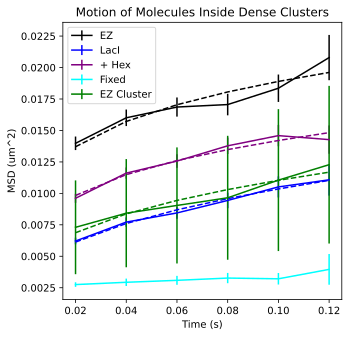

In [13]:
fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
ax.errorbar(list(msd_rpoc_ez_curve_in.keys()),list(msd_rpoc_ez_curve_in.values()),yerr=np.array(list(msd_error_rpoc_ez_curve_in.values()))*1.96,label="EZ",color="black")
#ax.errorbar(list(msd_rpoc_rif_all.keys()),list(msd_rpoc_rif_all.values()),yerr=np.array(list(msd_error_rpoc_rif_all.values()))*1.96,label="+ Rif",color="red")
ax.errorbar(list(msd_ll_ez_curve_all.keys()),list(msd_ll_ez_curve_all.values()),yerr=np.array(list(msd_error_ll_ez_curve_all.values()))*1.96,label="LacI",color="blue")
#ax.errorbar(list(msd_rpoc_m9_curve_in.keys()),list(msd_rpoc_m9_curve_in.values()),yerr=np.array(list(msd_error_rpoc_m9_curve_in.values()))*1.96,label="M9",color="orange")
ax.errorbar(list(msd_rpoc_hex5_curve_in.keys()),list(msd_rpoc_hex5_curve_in.values()),yerr=np.array(list(msd_error_rpoc_hex5_curve_in.values()))*1.96,label="+ Hex",color="purple")

ax.errorbar(list(ens_msd.keys()),list(ens_msd.values()),yerr=np.array(list(ens_msd_error.values()))*1.96,label="Fixed",color="cyan")

#cluster
ax.errorbar(list(msd_rp_ez_cluster_curve_ALL.keys()),list(msd_rp_ez_cluster_curve_ALL.values()),yerr=np.array(list(msd_rp_ez_cluster_curve_ALL.values()))/1.96,label="EZ Cluster",color="green")


#plot the power law fits
ax.plot(list(msd_rpoc_ez_curve_in.keys()),power_law_xy(list(msd_rpoc_ez_curve_in.keys()),*popt_rpoc_ez_curve_in),color="black",linestyle="--")
#ax.plot(list(msd_rpoc_rif_all.keys()),power_law_xy(list(msd_rpoc_rif_all.keys()),*popt_rpoc_rif_all),color="red",linestyle="--")
ax.plot(list(msd_ll_ez_curve_all.keys()),power_law_xy(list(msd_ll_ez_curve_all.keys()),*popt_ll_ez_curve_all),color="blue",linestyle="--")
#ax.plot(list(msd_rpoc_m9_curve_all.keys()),power_law_xy(list(msd_rpoc_m9_curve_all.keys()),*popt_rpoc_m9_curve_all),color="orange",linestyle="--")
ax.plot(list(msd_rpoc_hex5_curve_in.keys()),power_law_xy(list(msd_rpoc_hex5_curve_in.keys()),*popt_rpoc_hex5_curve_in),color="purple",linestyle="--")

#cluster
ax.plot(list(msd_rp_ez_cluster_curve_ALL.keys()),power_law_xy(list(msd_rp_ez_cluster_curve_ALL.keys()),*popt_rp_ez_cluster_curve_ALL),color="green",linestyle="--")
#plot a horizontal line at 0.0018
# ax.axhline(0.0018,color="black",linestyle="--")

ax.set_xlabel("Time (s)")
ax.set_ylabel("MSD (um^2)")
ax.set_title("Motion of Molecules Inside Dense Clusters")
# ax.set_yscale("log")
# ax.set_xscale("log")
ax.legend()
plt.show()


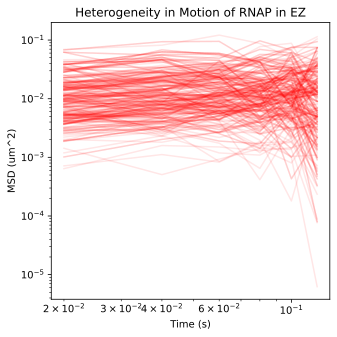

In [14]:
track_msd_rpoc_ez_cluster_curve_all = RPOC_ez_cluster_MSD.combined_store["ALL"].track_MSD
track_msd_rpoc_ez_curve_in = RPOC_ez_MSD.combined_store["IN"].track_MSD
track_RPOC_rif_MSD = RPOC_rif_MSD.combined_store["ALL"].track_MSD
track_ll_ez_curve_in = LL_ez_MSD.combined_store["ALL"].track_MSD

counter = 0
counter2 = 0
counter3 = 0
counter4 = 0
#plot the track MSD
fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
# for ID,track in track_msd_rpoc_ez_cluster_curve_all.items():
#     if counter < 300:
#         ax.plot(list(track.keys()),list(track.values()),color="black",alpha=0.1)
#         counter+=1
for ID,track in track_msd_rpoc_ez_curve_in.items():
    if counter2 < 300:
        ax.plot(list(track.keys()),list(track.values()),color="red",alpha=0.1)
        counter2+=1
# for ID,track in track_RPOC_rif_MSD.items():
#     if counter3 < 300:
#         ax.plot(list(track.keys()),list(track.values()),color="blue",alpha=0.1)
#         counter3+=1
# for ID,track in track_ll_ez_curve_in.items():
#     if counter4 < 1000:
#         ax.plot(list(track.keys()),list(track.values()),color="green",alpha=0.1)
#         counter4+=1


ax.set_xlabel("Time (s)")
ax.set_ylabel("MSD (um^2)")
ax.set_title("Heterogeneity in Motion of RNAP in EZ")
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()


Jump Distances

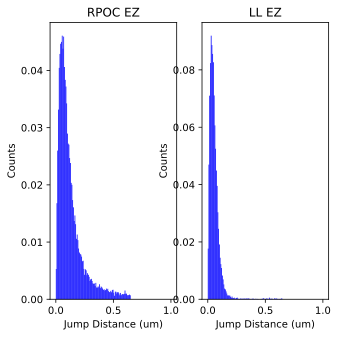

(array([0.00436758, 0.00943396, 0.00838574, 0.01554857, 0.02201258,
        0.02166317, 0.03092243, 0.03162124, 0.03319357, 0.02847659,
        0.0290007 , 0.03459119, 0.03633823, 0.0405311 , 0.03686233,
        0.03598882, 0.03092243, 0.0293501 , 0.03284416, 0.03354298,
        0.02952481, 0.03284416, 0.02480783, 0.02707897, 0.02410901,
        0.02131377, 0.02061495, 0.0172956 , 0.0172956 , 0.02078966,
        0.01607268, 0.01310273, 0.01030748, 0.01118099, 0.0113557 ,
        0.0113557 , 0.00943396, 0.00821104, 0.00751223, 0.00873515,
        0.00821104, 0.0059399 , 0.00646401, 0.00401817, 0.0055905 ,
        0.00489168, 0.00803634, 0.00541579, 0.00454228, 0.00366876,
        0.00227114, 0.00244584, 0.00279525, 0.00366876, 0.00331936,
        0.00209644, 0.00139762, 0.00262055, 0.00227114, 0.00122292,
        0.00192173, 0.00104822, 0.0001747 , 0.00157233, 0.00052411,
        0.00157233, 0.00209644, 0.00122292, 0.00139762, 0.00104822,
        0.00052411, 0.00052411, 0.00069881, 0.00

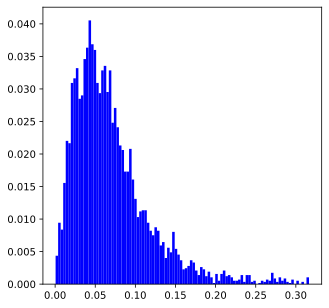

In [15]:
rp_ez_jump_distances = RPOC_ez_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
#plot the ones below threshold in red and the ones above in blue
fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,2)
ax = fig.add_subplot(gspec[0,0])
ax1 = fig.add_subplot(gspec[0,1])

threshold = 0.0
ax.hist(rp_ez_jump_distances[rp_ez_jump_distances>threshold],bins=100,color="blue",alpha=1,weights=np.ones(len(rp_ez_jump_distances[rp_ez_jump_distances>threshold]))/len(rp_ez_jump_distances[rp_ez_jump_distances>threshold]))
ax.hist(rp_ez_jump_distances[rp_ez_jump_distances<threshold],bins=100,color="red",alpha=1,weights=np.ones(len(rp_ez_jump_distances[rp_ez_jump_distances<threshold]))/len(rp_ez_jump_distances[rp_ez_jump_distances<threshold]))
ax.set_xlabel("Jump Distance (um)")
ax.set_ylabel("Counts")
ax.set_title("RPOC EZ")

ll_ez_jump_distances = LL_ez_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
#plot the ones below threshold in red and the ones above in blue
ax1.hist(ll_ez_jump_distances[ll_ez_jump_distances>threshold],bins=100,color="blue",alpha=1,weights=np.ones(len(ll_ez_jump_distances[ll_ez_jump_distances>threshold]))/len(ll_ez_jump_distances[ll_ez_jump_distances>threshold]))
ax1.hist(ll_ez_jump_distances[ll_ez_jump_distances<threshold],bins=100,color="red",alpha=1,weights=np.ones(len(ll_ez_jump_distances[ll_ez_jump_distances<threshold]))/len(ll_ez_jump_distances[ll_ez_jump_distances<threshold]))
ax1.set_xlabel("Jump Distance (um)")
ax1.set_ylabel("Counts")
ax1.set_title("LL EZ")
plt.show()

rp_ez_cluster_jump_distances = RPOC_ez_cluster_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
#plot the ones below threshold in red and the ones above in blue
fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
ax.hist(rp_ez_cluster_jump_distances[rp_ez_cluster_jump_distances>threshold],bins=100,color="blue",alpha=1,weights=np.ones(len(rp_ez_cluster_jump_distances[rp_ez_cluster_jump_distances>threshold]))/len(rp_ez_cluster_jump_distances[rp_ez_cluster_jump_distances>threshold]))




Text(0.5, 1.0, 'Ensemble Displacement Show Heterogeneity in Motion For RNAP')

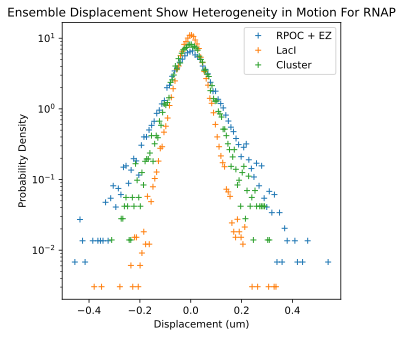

In [16]:
tau = 0.02
#rpoc_ez
rp_ez_ens_disp = RPOC_ez_MSD.combined_store["IN"].ensemble_displacement[tau]
rp_ez_ens_disp_coll = np.array(rp_ez_ens_disp).flatten()
#rpoc_m9
# rp_m9_ens_disp = RPOC_m9_MSD.combined_store["ALL"].ensemble_displacement[tau]
# rp_m9_ens_disp_coll = np.array(rp_m9_ens_disp).flatten()
# #rpoc_hex5
# rp_hex5_ens_disp = RPOC_hex5_MSD.combined_store["ALL"].ensemble_displacement[tau]
# rp_hex5_ens_disp_coll = np.array(rp_hex5_ens_disp).flatten()
# #rpoc_rif
# rp_rif_ens_disp = RPOC_rif_MSD.combined_store["ALL"].ensemble_displacement[tau]
# rp_rif_ens_disp_coll = np.array(rp_rif_ens_disp).flatten()
#ll_ez
ll_ez_ens_disp = LL_ez_MSD.combined_store["IN"].ensemble_displacement[tau]
ll_ez_ens_disp_coll = np.array(ll_ez_ens_disp).flatten()

rp_cluster_ens_disp = RPOC_ez_cluster_MSD.combined_store["ALL"].ensemble_displacement[tau]
rp_cluster_ens_disp_coll = np.array(rp_cluster_ens_disp).flatten()



coll = [rp_ez_ens_disp_coll,ll_ez_ens_disp_coll,rp_cluster_ens_disp_coll]#,rp_m9_ens_disp_coll,rp_hex5_ens_disp_coll,rp_rif_ens_disp_coll,ll_ez_ens_disp_coll]
names = ["RPOC + EZ","LacI","Cluster"]#,"RPOC M9","RPOC Hex5","RPOC Rif","LL EZ"]
fig = plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
for i in range(len(coll)):
    values_2, bin_edges = np.histogram(coll[i], bins=100, density=True)
    bin_centers_2 = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.plot(bin_centers_2, values_2,marker='+',linestyle='None',label="{}".format(names[i]))
ax.legend()
plt.yscale("log")
plt.xlabel("Displacement (um)")
plt.ylabel("Probability Density")
plt.title("Ensemble Displacement Show Heterogeneity in Motion For RNAP")

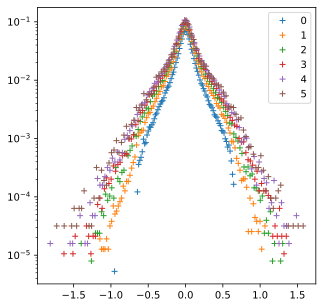

In [17]:
taus = [0.02,0.04,0.06,0.08,0.1,0.12]

#utility function of gaussian fit
def gaussian(x, mu, sig,amp):
        return amp*(1./(sig*np.sqrt(2*np.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
#multi gaussian fit using gaussian function
def multi_gaussian(x, *params):
        y = np.zeros_like(x)
        for i in range(0, len(params), 3):
            mu, sig, amp = params[i:i+3]
            y = y + gaussian(x, mu, sig, amp)
        return y

fig = plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
for i in range(len(taus)):
    ll_ez_ens_disp = RPOC_m9_MSD.combined_store["ALL"].ensemble_displacement[taus[i]]
    ll_ez_ens_disp_coll = np.array(ll_ez_ens_disp).flatten()
    values_2, bin_edges = np.histogram(ll_ez_ens_disp_coll, bins=100,weights=np.ones(len(ll_ez_ens_disp_coll))/len(ll_ez_ens_disp_coll))
    bin_centers_2 = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.plot(bin_centers_2, values_2,marker='+',linestyle='None',label="{}".format(i))
    
    
ax.legend()
ax.set_yscale("log")

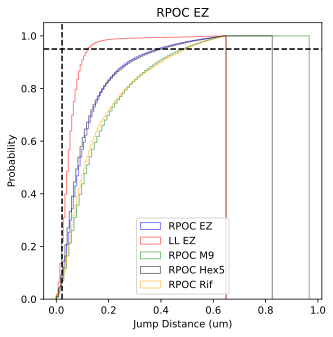

RPOC EZ
Mean: 0.1272 um
Std: 0.1163 um
N = 49896
LL EZ
Mean: 0.0574 um
Std: 0.0540 um
N = 32700
RPOC M9
Mean: 0.1712 um
Std: 0.1432 um
N = 94500
RPOC Hex5
Mean: 0.1252 um
Std: 0.1213 um
N = 102312
RPOC Rif
Mean: 0.1651 um
Std: 0.1471 um
N = 10128


In [18]:
#plot the ensemble displacement of both ll_ez and rpoc_ez on one plot
rp_ez_jump_distances = RPOC_ez_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
ll_ez_jump_distances = LL_ez_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
rp_m9_jump_distances = RPOC_m9_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
rp_hex5_jump_distances = RPOC_hex5_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]
rp_rif_jump_distances = RPOC_rif_MSD.combined_store["ALL"].ensemble_displacement_r[0.02]

fig =plt.figure(figsize=(5,5))
gspec = gs.GridSpec(1,1)
ax = fig.add_subplot(gspec[0,0])
ax.hist(rp_ez_jump_distances,bins=100,color="blue",alpha=0.5,weights=np.ones(len(rp_ez_jump_distances))/len(rp_ez_jump_distances),label="RPOC EZ",cumulative=True,histtype="step")
ax.hist(ll_ez_jump_distances,bins=100,color="red",alpha=0.5,weights=np.ones(len(ll_ez_jump_distances))/len(ll_ez_jump_distances),label="LL EZ",cumulative=True,histtype="step")
ax.hist(rp_m9_jump_distances,bins=100,color="green",alpha=0.5,weights=np.ones(len(rp_m9_jump_distances))/len(rp_m9_jump_distances),label="RPOC M9",cumulative=True,histtype="step")
ax.hist(rp_hex5_jump_distances,bins=100,color="black",alpha=0.5,weights=np.ones(len(rp_hex5_jump_distances))/len(rp_hex5_jump_distances),label="RPOC Hex5",cumulative=True,histtype="step")
ax.hist(rp_rif_jump_distances,bins=100,color="orange",alpha=0.5,weights=np.ones(len(rp_rif_jump_distances))/len(rp_rif_jump_distances),label="RPOC Rif",cumulative=True,histtype="step")
ax.set_xlabel("Jump Distance (um)")
ax.set_ylabel("Probability")
ax.set_title("RPOC EZ")
#plot a vertical line at 0.022 um
ax.axvline(0.022,color="black",linestyle="--")
ax.legend()
#plot a horizontal line at 0.9
ax.axhline(0.95,color="black",linestyle="--")
plt.show()

#print the means and stds to 4 decimal places
print("RPOC EZ")
print("Mean: {0:.4f} um".format(np.mean(rp_ez_jump_distances)))
print("Std: {0:.4f} um".format(np.std(rp_ez_jump_distances)))
print("N = {}".format(len(rp_ez_jump_distances)))
print("LL EZ")
print("Mean: {0:.4f} um".format(np.mean(ll_ez_jump_distances)))
print("Std: {0:.4f} um".format(np.std(ll_ez_jump_distances)))
print("N = {}".format(len(ll_ez_jump_distances)))
print("RPOC M9")
print("Mean: {0:.4f} um".format(np.mean(rp_m9_jump_distances)))
print("Std: {0:.4f} um".format(np.std(rp_m9_jump_distances)))
print("N = {}".format(len(rp_m9_jump_distances)))
print("RPOC Hex5")
print("Mean: {0:.4f} um".format(np.mean(rp_hex5_jump_distances)))
print("Std: {0:.4f} um".format(np.std(rp_hex5_jump_distances)))
print("N = {}".format(len(rp_hex5_jump_distances)))
print("RPOC Rif")
print("Mean: {0:.4f} um".format(np.mean(rp_rif_jump_distances)))
print("Std: {0:.4f} um".format(np.std(rp_rif_jump_distances)))
print("N = {}".format(len(rp_rif_jump_distances)))
